<a href="https://colab.research.google.com/github/lisosoma/BI_STATISTICS/blob/main/markov_chains.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import scipy.stats as sts
import scipy
import seaborn as sns
import scipy.optimize as opt
from scipy.optimize import fmin
import seaborn as sns

Пусть цепь Маркова имеет бесконечное число состояний. Обеспечим это функцией `T(x)`: каждый раз цепь переходит из состояния $x$ в $(x + 0.5) \mod \pi$. В качестве функции возьмем $e^x$.

In [ ]:
from scipy.integrate import quad

def marcov_chain(N):
    Ff = []

    # переход в следующее состояние
    def T(x):
        return (x + 0.5) % np.pi

    # временное среднее значение
    # функции f
    def time_average(x, f, T, n):
        s = 0
        for k in range(n):
            Ff.append(f(x))
            s += f(x)
            x = T(x)
        return s/n

    # пространственное среднее значение 
    # функции f, вычисленное с помощью
    # численного интегрирования
    def space_average(f):
        integral = quad(f, 0, np.pi)[0]
        return integral / np.pi

    f = lambda x: np.exp(x)

    print(f'Для n = {N} временное среднее равно {time_average(0, f, T, N)}')
    print(f'Для n = {N} пространственное среднее равно {space_average(f)}')

    return Ff

In [ ]:
N1, N2, N3 = 100, 10000, 1000000
n1 = np.linspace(0, N1, N1, endpoint = True, dtype = int)
f1 = marcov_chain(N1)
n2 = np.linspace(0, N2, N2, endpoint = True, dtype = int)
f2 = marcov_chain(N2)
n3 = np.linspace(0, N3, N3, endpoint = True, dtype = int)
f3 = marcov_chain(N3)

Для n = 100 временное среднее равно 6.791902562785302
Для n = 100 пространственное среднее равно 7.047601351970261
Для n = 10000 временное среднее равно 7.031286982408032
Для n = 10000 пространственное среднее равно 7.047601351970261
Для n = 1000000 временное среднее равно 7.047169600238246
Для n = 1000000 пространственное среднее равно 7.047601351970261


Как видно, эргодическая теорема верна.

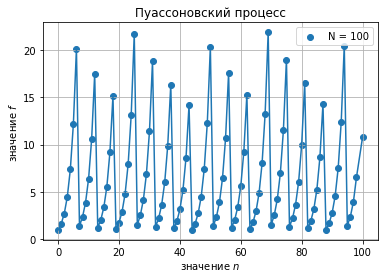

In [ ]:
plt.xlabel(rf'значение $n$')
plt.ylabel(rf'значение $f$')
plt.title(fr'Пуассоновский процесс')
plt.scatter(n1, f1, label = 'N = 100')
plt.plot(n1, f1)
plt.grid()
plt.legend()
plt.show()

Пусть марковская цепь имеет следующую матрицу вероятностей перехода для состояний

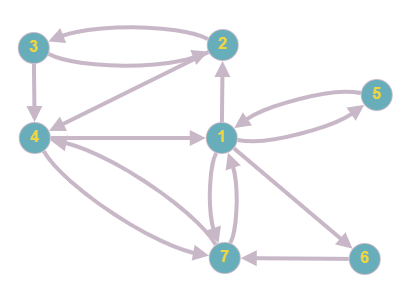

In [ ]:
p = np.array([[0,  1/4,   0,   0, 1/4, 1/4, 1/4], 
              [0,    0, 1/2, 1/2,   0,   0,   0],
              [0,  1/2,   0, 1/2,   0,   0,   0], 
              [1/2,  0,   0,   0,   0,   0, 1/2],
              [1,    0,   0,   0,   0,   0,   0],
              [0,    0,   0,   0,   0,   0,   1],
              [1/2,  0,   0, 1/2,   0,   0,   0]])

Нахождение ФСР: https://matrixcalc.org/vectors.html#eigenvectors(%7B%7B0,0,0,1/2,1,0,1/2%7D,%7B1/4,0,1/2,0,0,0,0%7D,%7B0,1/2,0,0,0,0,0%7D,%7B0,1/2,1/2,0,0,0,1/2%7D,%7B1/4,0,0,0,0,0,0%7D,%7B1/4,0,0,0,0,0,0%7D,%7B1/4,0,0,1/2,0,1,0%7D%7D).

Чтобы найти стационарное распределение $\pi$, необходимо решить уравнение $\pi = p\pi$, то есть найти левый собственный вектор матрицы $p$, который соответствует собственному числу $λ = 1$.

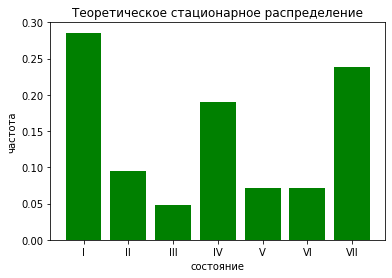

In [ ]:
pi = np.array([6/5, 2/5, 1/5, 4/5, 3/10, 3/10, 1])
pi = pi / np.sum(pi) # теоретическое стационарное распределение
alphab = ['I', 'II', 'III', 'IV', 'V', 'VI', 'VII']
frequencies = pi

pos = np.arange(len(alphab))
width = 0.8
ax = plt.axes()
ax.set_xticks(pos )
ax.set_xticklabels(alphab)
plt.xlabel(rf'состояние')
plt.ylabel(rf'частота')
plt.title(fr'Теоретическое стационарное распределение')
plt.bar(pos, frequencies, width, color='g')
plt.show()

In [ ]:
pi

array([0.28571429, 0.0952381 , 0.04761905, 0.19047619, 0.07142857,
       0.07142857, 0.23809524])

In [ ]:
from random import seed
import random
state=np.array([[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]])
stateHist=state
dfStateHist=pd.DataFrame(state)
distr_hist = [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]
for x in range(15):
    state=np.dot(state,p)
    stateHist=np.append(stateHist,state,axis=0)

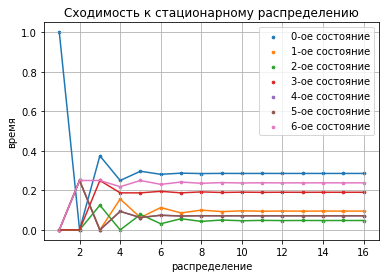

In [ ]:
plt.xlabel(rf'распределение')
plt.ylabel(rf'время')
plt.title(fr'Сходимость к стационарному распределению')
for i in range(7):
    plt.scatter(np.linspace(1, 16, 16, dtype = int), stateHist.T[i], label = f'{i}-ое состояние', s=7)
    plt.plot(np.linspace(1, 16, 16, dtype = int), stateHist.T[i])
plt.grid()
plt.legend()
plt.show()

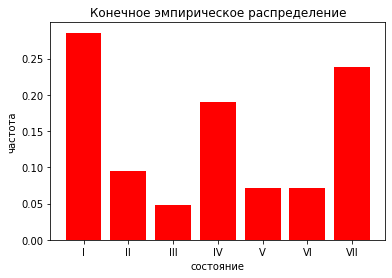

In [ ]:
alphab = ['I', 'II', 'III', 'IV', 'V', 'VI', 'VII']
frequencies = stateHist[-1]

pos = np.arange(len(alphab))
width = 0.8
ax = plt.axes()
ax.set_xticks(pos )
ax.set_xticklabels(alphab)
plt.xlabel(rf'состояние')
plt.ylabel(rf'частота')
plt.title(fr'Конечное эмпирическое распределение')
plt.bar(pos, frequencies, width, color='r')
plt.show()

Пусть у нас есть функция $f(x) = x$, тогда $\int f(x)d\pi(x)$ есть матожидание дискретной случайной величины, имеющей распределение $ \begin{bmatrix}
1 & 2 & 3 & 4 & 5 & 6 & 7 \\
0.28571429 & 0.0952381  & 0.04761905 & 0.19047619 & 0.07142857 & 0.07142857 & 0.23809524 
\end{bmatrix}  $.

In [ ]:
states = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0]
def marcov_chain(N):
    Ff = []

    # переход в следующее состояние
    def T(x):
        return np.random.choice(states,  p = p[int(1 - x)])

    # временное среднее значение
    # функции f
    def time_average(x, f, T, n):
        s = 0
        for k in range(n):
            Ff.append(x)
            s += x
            x = int(T(x))
        return s/n

    # пространственное среднее значение 
    def space_average(f):
        return np.mean(frequencies @ states)

    print(f'Для n = {N} временное среднее равно {time_average(1, f, T, N)}')
    print(f'Для n = {N} пространственное среднее равно {space_average(f)}')

    return Ff

In [ ]:
N1, N2, N3 = 100, 10000, 1000000
n1 = np.linspace(1, N1, N1, endpoint = True, dtype = int)
f1 = marcov_chain(N1)
n2 = np.linspace(1, N2, N2, endpoint = True, dtype = int)
f2 = marcov_chain(N2)
n3 = np.linspace(1, N3, N3, endpoint = True, dtype = int)
f3 = marcov_chain(N3)

Для n = 100 временное среднее равно 3.86
Для n = 100 пространственное среднее равно 3.8332834243774414
Для n = 10000 временное среднее равно 3.6765
Для n = 10000 пространственное среднее равно 3.8332834243774414
Для n = 1000000 временное среднее равно 3.695625
Для n = 1000000 пространственное среднее равно 3.8332834243774414


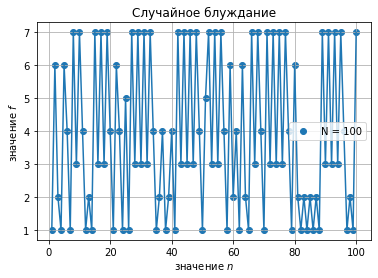

In [ ]:
plt.xlabel(rf'значение $n$')
plt.ylabel(rf'значение $f$')
plt.title(fr'Случайное блуждание')
plt.scatter(n1, f1, label = 'N = 100')
plt.plot(n1, f1)
plt.grid()
plt.legend()
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Примитивная цепь

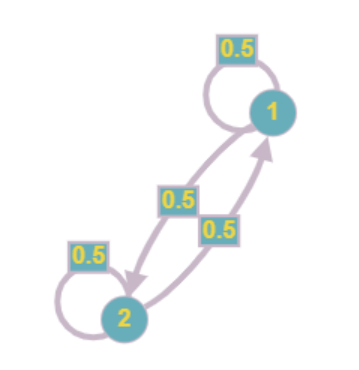

In [ ]:
p = np.array([[1/2, 1/2],[1/2, 1/2]])

In [ ]:
from random import seed
import random
state=np.array([[1.0, 0.0]])
stateHist=state
dfStateHist=pd.DataFrame(state)
distr_hist = [[0.0, 0.0]]
for x in range(15):
    state=np.dot(state,p)
    stateHist=np.append(stateHist,state,axis=0)

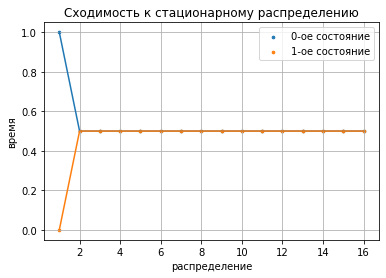

In [ ]:
plt.xlabel(rf'распределение')
plt.ylabel(rf'время')
plt.title(fr'Сходимость к стационарному распределению')
for i in range(2):
    plt.scatter(np.linspace(1, 16, 16, dtype = int), stateHist.T[i], label = f'{i}-ое состояние', s=7)
    plt.plot(np.linspace(1, 16, 16, dtype = int), stateHist.T[i])
plt.grid()
plt.legend()
plt.show()

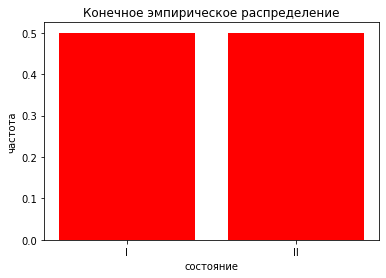

In [ ]:
alphab = ['I', 'II']
frequencies = stateHist[-1]

pos = np.arange(len(alphab))
width = 0.8
ax = plt.axes()
ax.set_xticks(pos )
ax.set_xticklabels(alphab)
plt.xlabel(rf'состояние')
plt.ylabel(rf'частота')
plt.title(fr'Конечное эмпирическое распределение')
plt.bar(pos, frequencies, width, color='r')
plt.show()

In [ ]:
states = [1.0, 2.0]
def marcov_chain(N):
    Ff = []

    # переход в следующее состояние
    def T(x):
        return np.random.choice(states,  p = p[int(1 - x)])

    # временное среднее значение
    # функции f
    def time_average(x, f, T, n):
        s = 0
        for k in range(n):
            Ff.append(x)
            s += x
            x = int(T(x))
        return s/n

    # пространственное среднее значение 
    def space_average(f):
        return np.mean(frequencies @ states)

    print(f'Для n = {N} временное среднее равно {time_average(1, f, T, N)}')
    print(f'Для n = {N} пространственное среднее равно {space_average(f)}')

    return Ff

In [ ]:
N1, N2, N3 = 100, 10000, 1000000
n1 = np.linspace(1, N1, N1, endpoint = True, dtype = int)
f1 = marcov_chain(N1)

Для n = 100 временное среднее равно 1.59
Для n = 100 пространственное среднее равно 1.5


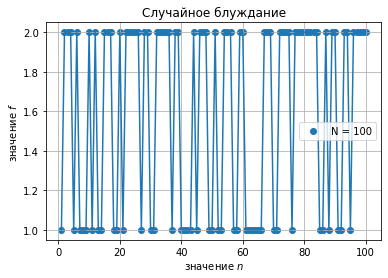

In [ ]:
plt.xlabel(rf'значение $n$')
plt.ylabel(rf'значение $f$')
plt.title(fr'Случайное блуждание')
plt.scatter(n1, f1, label = 'N = 100')
plt.plot(n1, f1)
plt.grid()
plt.legend()
plt.show()

Проведем частотный анализ на основе трех классических произведений русской литературы: "Мастер и Маргарита" Булгакова, "Мертвые души" Гоголя и "Обломов" Гончарова.

In [ ]:
alph = []
for i in range(ord('а'), ord('я')):
    alph.append(chr(i))
alph.insert(6, 'ё')
alph.append('я')
alph.append(' ')

In [ ]:
d = {}
fr = {}

def add_to_freq(file1):
    while True:
        line = file1.readline()
        if not line:
            break
        for i in range(1, len(line)):
            s = str(line[i-1:i+1]).lower()
            if s[0] in alph[:33] and s[1] in alph:
              if s in d.keys():
                d[s] += 1
              else:
                d[s] = 1
            if s[0] not in alph[:33] and s[1] in alph[:33]:
              if s[1] in fr.keys():
                fr[s[1]] += 1
              else:
                fr[s[1]] = 1

add_to_freq(open("/content/drive/MyDrive/stat_hw2.12/мастер_и_маргарита.txt", "r"))
add_to_freq(open("/content/drive/MyDrive/stat_hw2.12/обломов.txt", "r"))
add_to_freq(open("/content/drive/MyDrive/stat_hw2.12/мертвые_души.txt", "r"))

In [ ]:
M2 = np.zeros((34, 34))
for i in range(34):
    for j in range(34):
        if alph[i] + alph[j] in d.keys():
            M2[i][j] =  d[alph[i] + alph[j]]

In [ ]:
for i in range(34):
    M2[i] /= np.sum(M2[i])

Сохраним частоты.

In [ ]:
import csv

with open('freq.csv', 'w') as f:
    w = csv.DictWriter(f, d.keys())
    w.writeheader()
    w.writerow(d)

with open('start.csv', 'w') as f:
    w = csv.DictWriter(f, fr.keys())
    w.writeheader()
    w.writerow(fr)

In [ ]:
freq = np.array(list(fr.values())) / sum(list(fr.values()))
starts = list(fr.keys())

Сгенерируем несколько слов. Алгоритм следующий: выбираем стартовую букву из возможного набора с помощью `random.choice` с параметром `p`, равным частотам стартовых букв. Далее, пока очередная выбранная буква не равна пробелу (но с пробела мы не стартуем, поэтому слово будет гарантированно состоять хотя бы из одной буквы), мы выбираем следующую буквы, исходя из матрицы M, в которой хранятся вероятности перехода (в каждой строке хранится вероятность перейти из буквы, отвечающей за эту строку в другую возможную букву), добавляем двухбуквенное сочетение в список, стартовая буква становится равной той, что была сгенерированна на текущем шаге.

In [ ]:
for i in range(20):
    start = np.random.choice(starts, p = freq)
    word = [start]
    while start != ' ':
        s = np.random.choice(alph, p = M2[alph.index(start)])
        word.append(s)
        start = s
    print(''.join(word))

товеняво 
пой 
ритихгова 
пимедечум 
малах 
вь 
каги 
дикой 
ера 
пралоти 
поденолилета 
сескровосмещатадри 
ай 
л 
датрак 
малулиль 
оеглю 
котни 
или 
ницуло 


Попробуем генерировать предложения на основе указанных выше произведений.

In [ ]:
import string
import re

w = {}
s = {}
ww = []

def add_to_freq_w(file1):
    j = 0
    while True:
        line = file1.readline()
        if not line:
            break
        line = re.sub(r"([\w/'+$\s-]+|[^\w/'+$\s-]+)\s*", r"\1 ", line)
        res = line.split()
        if len(res) > 0:
            ww.append(str(res[0]).lower())
        for i in range(1, len(res)):
            if str(res[i-1]).lower() + ' ' + str(res[i]).lower() in w.keys():
                w[str(res[i-1]).lower() + ' ' + str(res[i]).lower()] += 1
            else:
                w[str(res[i-1]).lower() + ' ' + str(res[i]).lower()] = 1
            ww.append(str(res[i]).lower())

            if str(res[i])[0].isupper():
                if str(res[i].lower()) in s.keys():
                    s[str(res[i]).lower()] += 1
                else:
                    s[str(res[i]).lower()] = 1

add_to_freq_w(open("/content/drive/MyDrive/stat_hw2.12/мастер_и_маргарита.txt", "r"))
add_to_freq_w(open("/content/drive/MyDrive/stat_hw2.12/обломов.txt", "r"))
add_to_freq_w(open("/content/drive/MyDrive/stat_hw2.12/мертвые_души.txt", "r"))


In [ ]:
freq = np.array(list(s.values())) / sum(list(s.values()))
starts = list(s.keys())

In [ ]:
ww = list(set(ww))

In [ ]:
start = np.random.choice(starts, p = freq)
word = []
for i in range(200):
    ss = []
    ff = []
    sss = []
    for www in ww:
        ss.append(start + ' ' + www)
    for s in ss:
        if s in w.keys():
            ff.append(w[s])
            sss.append(s)
    ff = np.array(ff) / sum(ff)
    s = np.random.choice(sss, p = ff).split(" ")[1:][0]
    word.append(s)
    start = s
print(' '.join(word))

съездит в каком случае налицо , а то : похлопотать , вороны так истерзан в ней на гулянье . в него прошел со стен смести на именины , – о подковке , – кричали с чичиковым . впустить ? - ты , так купи портеру , поднял ногу . - что поселился бесенок так и больше всего этого ..." - сказал племянник подгадил . она , что пишут вам во всех этих обещанных уже на него ... или не было ни утрени , дурак ! – рыжий глядел на козлах , дрожащий старик упал , только отсрочишь , как можно ручаться , зевнул , что это любовь их экипажи , которому , но зато уж я никакого дьявола не слышно от какого-нибудь наказания , я ядовитый ! да шашку-то , чтобы пронестись в работу , где место . в то , что грузди или баба . да постой ! ведь погляди-ка в разных городах не играющую , в бинокль смотреть прямо навстречу муразов остановился возле меня вечер после покажу . ненавидимый прокуратором развернулся весь в том , быстро и упрется ? иван николаевич зловеще захохотав , не удалось ей новости , что был паркету . несча

Ссылка на диск со всеми файлами https://drive.google.com/drive/folders/1Gkq5AvHcuq5roeW07ilgqgnhN9QQvusD?usp=sharing